# Calculate the upper bound to accuracy on nested subsets of data.

This notebook shows that the upper bound to accuracy increases on subsets from 72% on the entire set to 85% on samples of size 2000.

In [1]:
import genre_data_loader, genre_upperbound, nested_subsets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# get currrent date for latest version of data set
%store -r now

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)

In [3]:
# call data loader script
genre_data = genre_data_loader.LoadGenreData(now, X_path_train = X_path_train, y_path_train = y_path_train, 
                                             X_path_test = X_path_test, y_path_test = y_path_test)

In [4]:
# load data with genre sets
data = genre_data.as_sets()
# create list of all genres
list_of_genres = genre_data.get_list_of_genres()

Let's evaluate on nested subsets using the NestedSubsets class:

In [5]:
def subset_runs_errors(data, percentage = .1, runs = 2):
    """
    Input:genre data, percentage=.1, runs=2.
    Output: DF with errors for runs and subsets; 
        mean and std over runs for each subset size
    """
    data = data
    percentage = percentage
    # initialize error DF
    err = pd.DataFrame(columns = [f'run_{i}' for i in range(runs)])
    err.columns.name = 'run'
    err.index.name = 'subset_size'
    for i in range(runs):
        subsets = nested_subsets.NestedSubsets(data, percentage = percentage)
        sample_size = subsets.sample_size # get size of first subsample (=full set)
        for subset in subsets:
            if sample_size > subsets.remainder_size:
                error = genre_upperbound.UpperBound(subset)[1] 
                err.at[sample_size,f'run_{i}'] = error
                sample_size = subsets.sample_size
            else:
                break
    err['mean'] = err.mean(axis = 1)
    err['std'] = err.std(axis = 1)
    return err

In [6]:
err = subset_runs_errors(data,.1,10)

In [8]:
runs = 10
acc = 1- err[[f'run_{i}' for i in range(runs)]+['mean']]
acc['std'] = acc.std(axis = 1)

In [9]:
acc

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,1.110223e-16
13923,0.861452,0.863966,0.862889,0.861668,0.861668,0.863966,0.863679,0.86253,0.863392,0.864182,0.862939,1.000957e-03
12376,0.863769,0.866758,0.863526,0.862961,0.86393,0.866435,0.865142,0.865385,0.866031,0.866597,0.865053,1.337666e-03
10829,0.864623,0.868317,0.866562,0.867208,0.863976,0.868501,0.867301,0.867024,0.868132,0.869332,0.867098,1.604147e-03
9282,0.868671,0.871472,0.870287,0.87061,0.866408,0.871687,0.86964,0.87298,0.871041,0.870933,0.870373,1.723646e-03
7735,0.873562,0.874855,0.875372,0.876147,0.86852,0.874337,0.871493,0.877699,0.872786,0.876018,0.874079,2.510186e-03
6188,0.874434,0.879929,0.874273,0.879121,0.871364,0.878798,0.875404,0.882999,0.875727,0.881868,0.877392,3.527247e-03
4641,0.878044,0.887524,0.88106,0.88537,0.875673,0.884077,0.880414,0.888386,0.88343,0.884723,0.882870,3.846234e-03
3094,0.885908,0.895604,0.884615,0.891403,0.886555,0.889787,0.88914,0.896251,0.89108,0.892049,0.890239,3.682887e-03


In [10]:
err

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,2.775558e-17
13923,0.138548,0.136034,0.137111,0.138332,0.138332,0.136034,0.136321,0.13747,0.136608,0.135818,0.137061,1.000957e-03
12376,0.136231,0.133242,0.136474,0.137039,0.13607,0.133565,0.134858,0.134615,0.133969,0.133403,0.134947,1.337666e-03
10829,0.135377,0.131683,0.133438,0.132792,0.136024,0.131499,0.132699,0.132976,0.131868,0.130668,0.132902,1.604147e-03
9282,0.131329,0.128528,0.129713,0.12939,0.133592,0.128313,0.13036,0.12702,0.128959,0.129067,0.129627,1.723646e-03
7735,0.126438,0.125145,0.124628,0.123853,0.13148,0.125663,0.128507,0.122301,0.127214,0.123982,0.125921,2.510186e-03
6188,0.125566,0.120071,0.125727,0.120879,0.128636,0.121202,0.124596,0.117001,0.124273,0.118132,0.122608,3.527247e-03
4641,0.121956,0.112476,0.11894,0.11463,0.124327,0.115923,0.119586,0.111614,0.11657,0.115277,0.117130,3.846234e-03
3094,0.114092,0.104396,0.115385,0.108597,0.113445,0.110213,0.11086,0.103749,0.10892,0.107951,0.109761,3.682887e-03


Text(0, 0.5, 'errors')

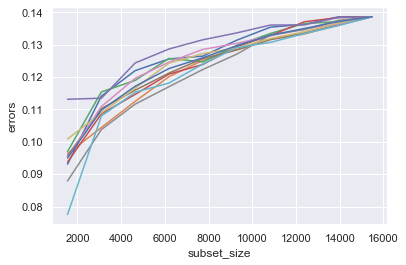

In [11]:
runs = 10
fig, ax = plt.subplots()
(err[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('errors')

Text(0, 0.5, 'accuracy')

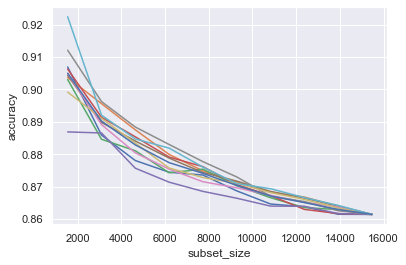

In [12]:
runs = 10
fig, ax = plt.subplots()
(acc[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('accuracy')